In [70]:
# the dataset is from "https://www.kaggle.com/kondla/carinsurance"
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import mglearn
car_insurance = pd.read_csv("/Users/Man/Desktop/Python_3/K_Nearest_Neighbor/carinsurance/carInsurance_train.csv")

In [49]:
# check to see if csv file loaded sucessfully
car_insurance.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [5]:
# check the dataset variables
car_insurance.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [36]:
# check the unique value of each variable
print(f"""The unique values for Age:\n {car_insurance["Age"].unique()}""", end="\n\n")
print(f"""The unique values for Job:\n {car_insurance["Job"].unique()}""", end="\n\n")
print(f"""The unique values for Marital:\n {car_insurance["Marital"].unique()}""", end="\n\n")
print(f"""The unique values for Education:\n {car_insurance["Education"].unique()}""", end="\n\n")
print(f"""The unique values for Default:\n {car_insurance["Default"].unique()}""", end="\n\n")
print(f"""The unique values for Balance:\n {car_insurance["Balance"].unique()}""", end="\n\n")
print(f"""The unique values for HHInsurance:\n {car_insurance["HHInsurance"].unique()}""", end="\n\n")
print(f"""The unique values for CarLoan:\n {car_insurance["CarLoan"].unique()}""", end="\n\n")
print(f"""The unique values for Communication:\n {car_insurance["Communication"].unique()}""", end="\n\n")
print(f"""The unique values for LastContactDay:\n {car_insurance["LastContactDay"].unique()}""", end="\n\n")
print(f"""The unique values for LastContactMonth:\n {car_insurance["LastContactMonth"].unique()}""", end="\n\n")
print(f"""The unique values for NoOfContacts:\n {car_insurance["NoOfContacts"].unique()}""", end="\n\n")
print(f"""The unique values for DaysPassed:\n {car_insurance["DaysPassed"].unique()}""", end="\n\n")
print(f"""The unique values for PrevAttempts:\n {car_insurance["PrevAttempts"].unique()}""", end="\n\n")
print(f"""The unique values for Outcome:\n {car_insurance["Outcome"].unique()}""", end="\n\n")
print(f"""The unique values for CallStart:\n {car_insurance["CallStart"].unique()}""", end="\n\n")
print(f"""The unique values for CallEnd:\n {car_insurance["CallEnd"].unique()}""", end="\n\n")
print(f"""The unique values for CarInsurance:\n {car_insurance["CarInsurance"].unique()}""", end="\n\n")

The unique values for Age:
 [32 29 25 30 37 35 27 53 44 38 61 34 46 49 50 57 80 31 63 60 54 45 42 36
 39 33 41 40 79 47 78 52 18 28 58 23 55 56 43 48 19 62 64 24 73 26 51 59
 66 20 77 71 69 72 68 65 22 67 70 75 21 87 83 82 84 81 76 92 86 95]

The unique values for Job:
 ['management' 'blue-collar' 'student' 'technician' 'admin.' 'services'
 'self-employed' 'retired' nan 'housemaid' 'entrepreneur' 'unemployed']

The unique values for Marital:
 ['single' 'married' 'divorced']

The unique values for Education:
 ['tertiary' 'primary' 'secondary' nan]

The unique values for Default:
 [0 1]

The unique values for Balance:
 [1218 1156  637 ... 2954 1513 -400]

The unique values for HHInsurance:
 [1 0]

The unique values for CarLoan:
 [0 1]

The unique values for Communication:
 ['telephone' nan 'cellular']

The unique values for LastContactDay:
 [28 26  3 11 22 17 12 18  1 29 27 19  6  5  8 21  9 20 16 30  2 13 14 15
 23  4  7 10 24 25 31]

The unique values for LastContactMonth:
 ['jan' 'may

In [37]:
# get the shape of the dataset
car_insurance.shape

(4000, 19)

In [88]:
# drop the dataset columns (LastContactDay, LastContactMonth, CallStart, CallEnd)
car_insurance.drop(["Id","LastContactDay", "LastContactMonth", "CallStart", "CallEnd"], axis=1, inplace=True)

In [89]:
car_insurance.shape

(4000, 14)

In [90]:
# drop any row that has nan value
cleaned = car_insurance.dropna()

In [91]:
cleaned.shape

(907, 14)

In [92]:
cleaned.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
2,29,management,single,tertiary,0,637,1,0,cellular,1,119,1,failure,1
5,32,technician,single,tertiary,0,1625,0,0,cellular,1,109,1,failure,1
15,61,management,single,tertiary,0,2,0,0,cellular,1,114,3,failure,1
16,34,admin.,single,secondary,0,69,1,0,telephone,3,362,4,other,0
17,46,management,married,tertiary,0,7331,0,0,cellular,4,95,2,other,1


In [93]:
# filter out the last target column
cleaned.iloc[:5, :14]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
2,29,management,single,tertiary,0,637,1,0,cellular,1,119,1,failure,1
5,32,technician,single,tertiary,0,1625,0,0,cellular,1,109,1,failure,1
15,61,management,single,tertiary,0,2,0,0,cellular,1,114,3,failure,1
16,34,admin.,single,secondary,0,69,1,0,telephone,3,362,4,other,0
17,46,management,married,tertiary,0,7331,0,0,cellular,4,95,2,other,1


In [94]:
# replace the admin. value at the Job column to administration
cleaned["Job"].replace("admin.", "administration", inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [95]:
# double check the changes
print(f"""The unique values for Job:\n {cleaned["Job"].unique()}""")

The unique values for Job:
 ['management' 'technician' 'administration' 'blue-collar' 'retired'
 'entrepreneur' 'student' 'self-employed' 'services' 'unemployed'
 'housemaid']


In [ ]:
# convert job title to number
cleaned["Job"].replace({"unemployed":0, "housemaid":1, "student":2, "retired":3, "self-employed":4, "blue-collar":5, "services":6, "technician":7, "management":8, "administration":9, "entrepreneur":10}, inplace=True)

In [128]:
#convert Marital status to number
cleaned["Marital"].replace({"single":0, "married":1, "divorced":2}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [131]:
cleaned["Education"].replace({"primary":0, "secondary":1, "tertiary":2}, inplace=True)
cleaned["Communication"].replace({"telephone":0, "cellular":1}, inplace=True)
cleaned["Outcome"].replace({"failure":0, "success":1, "other":2}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [136]:
# making Xy train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned.iloc[:,:13], cleaned.iloc[:,-1], random_state=0)

In [140]:
# print the shape of the Xy train and test data
print(f"The shape of X_train:\n {X_train.shape}")
print(f"The shape of X_test:\n {X_test.shape}")
print(f"The shape of y_train:\n {y_train.shape}")
print(f"The shape of y_test:\n {y_test.shape}")

The shape of X_train:
 (680, 13)
The shape of X_test:
 (227, 13)
The shape of y_train:
 (680,)
The shape of y_test:
 (227,)


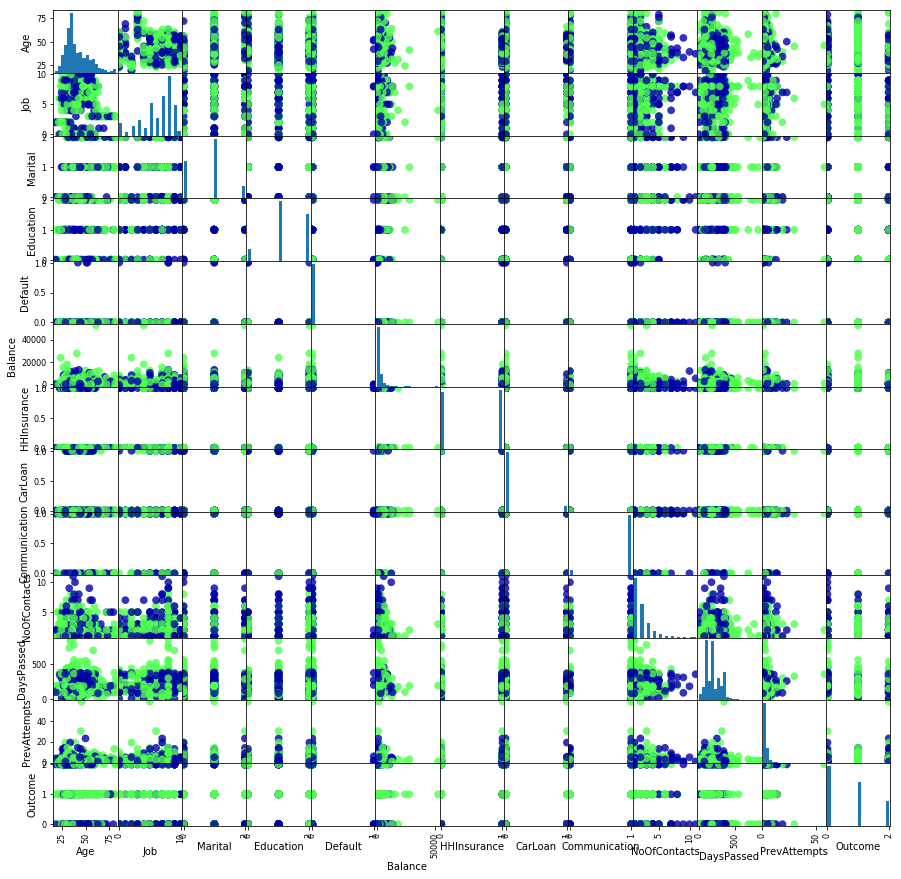

In [141]:
# create a pair plot
grr = pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(15, 15), marker="o", hist_kwds={"bins": 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [150]:
# use KNeighborsClassifier
# initiate the class object
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [151]:
# build the K-nearest model on the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [152]:
y_pred = knn.predict(X_test)
print(f"Test set predictions:\n {y_pred}")

Test set predictions:
 [1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1
 1 1 0 1 1]


In [153]:
print(f"Test set score: {knn.score(X_test, y_test):.2f}")

Test set score: 0.63


In [ ]:
# since the test set score is only 0.63, it is not a really accurate model.